# Basic Information

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Wine Data Preview:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8     

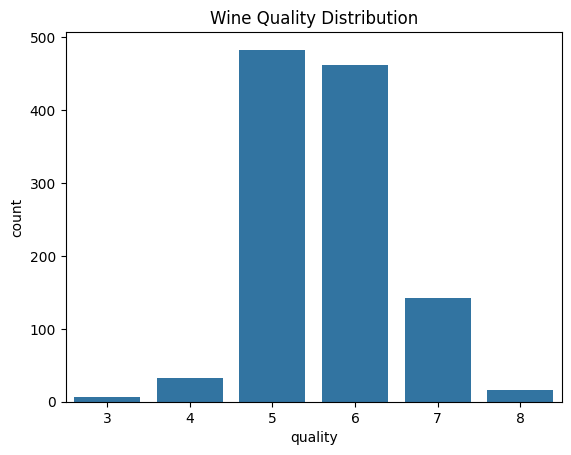

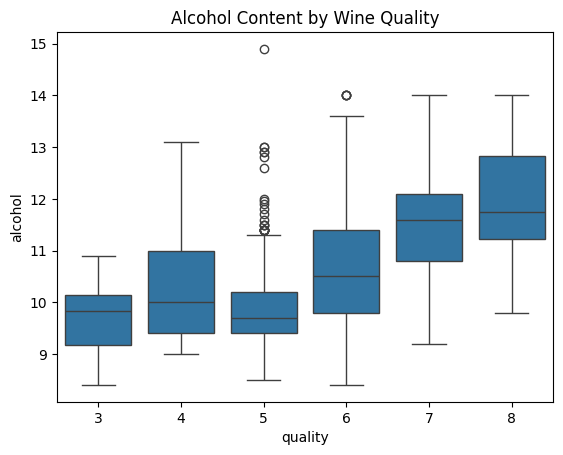

In [22]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from gensim import corpora, models

# Initialize nltk components
nltk.download('vader_lexicon')
nltk.download('stopwords')

# Load wine dataset
wine_data = pd.read_csv("https://raw.githubusercontent.com/STATS201-DKU-Autumn2024/Aaron/refs/heads/main/data/WineQT.csv")

# Inspect the wine dataset
print("Wine Data Preview:")
print(wine_data.head())

# Check the column names and data types to understand the structure of the dataset
print("Wine Data Columns and Types:")
print(wine_data.dtypes)

# You can also check for missing values if needed
print("Missing Values in Wine Data:")
print(wine_data.isnull().sum())

# You can proceed with the rest of your analysis as follows
# Example: If you want to analyze the features of the dataset, you can visualize distributions or relationships.

# Visualizing distribution of wine quality
sns.countplot(data=wine_data, x='quality')
plt.title('Wine Quality Distribution')
plt.show()

# If you want to explore relationships between features, for example, alcohol content vs quality
sns.boxplot(data=wine_data, x='quality', y='alcohol')
plt.title('Alcohol Content by Wine Quality')
plt.show()

# Select features and target variable
features = ['alcohol', 'acidity', 'pH', 'sulphates', 'citric_acid']  # Update based on actual columns in your dataset
target = 'quality'  # Assuming wine quality is the target




# Machine Learning Method to better evaluate wine quality

## Confusion Matrix method

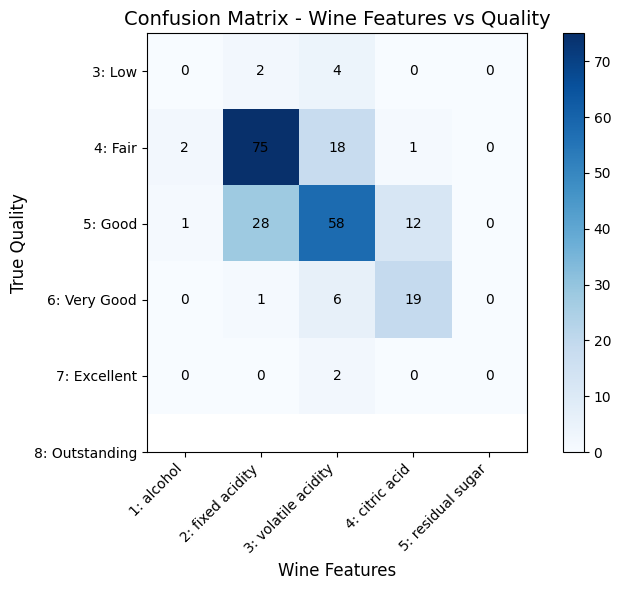

In [59]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Load the wine dataset
wine_data = pd.read_csv("https://raw.githubusercontent.com/STATS201-DKU-Autumn2024/Aaron/refs/heads/main/data/WineQT.csv")

# Define features and target variable
features = ['alcohol', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar']  # Updated feature list
target = 'quality'

# Drop rows with missing values in selected columns
wine_data = wine_data.dropna(subset=features + [target])

# Separate features and target
X = wine_data[features]
y = wine_data[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions and evaluate model
y_pred = model.predict(X_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Define x-axis labels
x_labels = ['1: alcohol', '2: fixed acidity', '3: volatile acidity', '4: citric acid', '5: residual sugar']

# Define y-axis labels (True Quality)
y_labels = ['3: Low', '4: Fair', '5: Good', '6: Very Good', '7: Excellent', '8: Outstanding']

# Create a ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=y_labels)

# Plot the confusion matrix with updated axes
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(conf_matrix, interpolation='nearest', cmap='Blues')
cbar = ax.figure.colorbar(im, ax=ax)

# Set x and y ticks
ax.set_xticks(np.arange(len(x_labels)))
ax.set_xticklabels(x_labels, rotation=45, ha="right", fontsize=10)
ax.set_yticks(np.arange(len(y_labels)))
ax.set_yticklabels(y_labels, fontsize=10)

# Set labels and title
plt.title('Confusion Matrix - Wine Features vs Quality', fontsize=14)
plt.xlabel('Wine Features', fontsize=12)
plt.ylabel('True Quality', fontsize=12)

# Annotate the matrix with counts
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(j, i, format(conf_matrix[i, j], 'd'), ha="center", va="center", color="black")

plt.tight_layout()
plt.show()


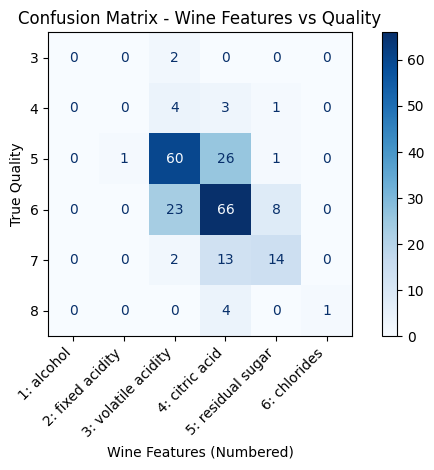

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Load the wine dataset
wine_data = pd.read_csv("https://raw.githubusercontent.com/STATS201-DKU-Autumn2024/Aaron/refs/heads/main/data/WineQT.csv")

# Define the features and the target variable
features = ['alcohol', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
            'chlorides']
target = 'quality'  # Quality of wine is the target

# Drop rows with missing values in selected columns
wine_data = wine_data.dropna(subset=features + [target])

# Separate features (X) and target (y)
X = wine_data[features]
y = wine_data[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Compute and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Dynamically get the unique labels from y_test (to ensure it’s sorted)
labels = np.unique(y_test)

# Sort quality labels from low to high (ensuring quality ranks in increasing order)
sorted_labels = sorted(labels)

# Pass the sorted labels to the ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=sorted_labels)
disp.plot(cmap='Blues', values_format='d')

# Customizing the plot for better clarity
plt.title('Confusion Matrix - Wine Features vs Quality')

# Mapping each feature to a number (1 to 11)
feature_number_map = {feature: str(i+1) for i, feature in enumerate(features)}

# Create labels for the x-axis, associating each feature with its respective number
feature_labels = [f"{feature_number_map[feature]}: {feature}" for feature in features]

# Update x-axis labels and add corresponding number
plt.xlabel('Wine Features (Numbered)', fontsize=10)
plt.ylabel('True Quality', fontsize=10)
plt.xticks(ticks=np.arange(len(features)), labels=feature_labels, rotation=45, ha="right")

# Show the plot
plt.tight_layout()
plt.show()


## XGboost method

Accuracy: 0.6724890829694323
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         6
           2       0.69      0.79      0.74        96
           3       0.67      0.62      0.64        99
           4       0.68      0.65      0.67        26
           5       0.00      0.00      0.00         2

    accuracy                           0.67       229
   macro avg       0.41      0.41      0.41       229
weighted avg       0.66      0.67      0.66       229



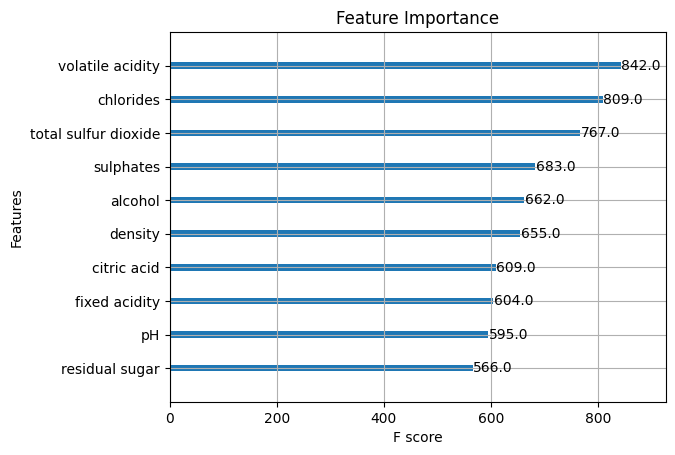

In [26]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

X = data.drop(columns=['quality','Id'])
y = data['quality']


label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # 将质量类别转为数字

# 将数据拆分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化 XGBoost 分类器
model_xgb = xgb.XGBClassifier(objective="multi:softmax", num_class=len(np.unique(y)), random_state=42)

# 训练模型
model_xgb.fit(X_train, y_train)

# 预测测试集
y_pred_xgb = model_xgb.predict(X_test)

# 输出分类报告
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

# 可视化特征重要性（可选）
import matplotlib.pyplot as plt
xgb.plot_importance(model_xgb, importance_type="weight", max_num_features=10)
plt.title('Feature Importance')
plt.show()


In [2]:
!pip install dowhy causalimpact matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.4/398.4 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.5/174.5 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 32.1 MB/s eta 0:00:00
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.11
    Uninstalling Cython-3.0.11:
      Successfully uninstalled Cython-3.0.11


ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


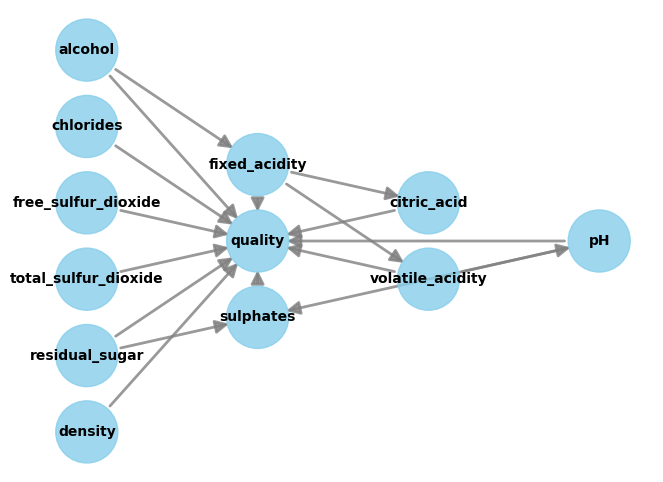

NetworkXError: The sets are not disjoint, with intersection {'fixed_acidity'}

In [27]:
# 导入所需的库
import dowhy
import pandas as pd
import numpy as np
from dowhy import CausalModel
import matplotlib.pyplot as plt

# 假设你已经加载了包含红酒数据的DataFrame
# 我会模拟一个示例数据集，你需要替换为你的实际数据集
data = pd.DataFrame({
    'fixed_acidity': np.random.uniform(4.0, 15.0, size=1000),
    'volatile_acidity': np.random.uniform(0.1, 1.5, size=1000),
    'citric_acid': np.random.uniform(0.0, 1.0, size=1000),
    'residual_sugar': np.random.uniform(0.1, 10.0, size=1000),
    'chlorides': np.random.uniform(0.01, 0.2, size=1000),
    'free_sulfur_dioxide': np.random.uniform(5.0, 70.0, size=1000),
    'total_sulfur_dioxide': np.random.uniform(15.0, 150.0, size=1000),
    'density': np.random.uniform(0.99, 1.05, size=1000),
    'pH': np.random.uniform(2.5, 4.0, size=1000),
    'sulphates': np.random.uniform(0.3, 2.0, size=1000),
    'alcohol': np.random.uniform(8.0, 15.0, size=1000),
    'quality': np.random.randint(3, 9, size=1000)
})

# 展示前几行数据
data.head()

# 构建有向无环图（DAG），指定所有变量之间的因果关系
model = CausalModel(
    data=data,
    treatment=['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
               'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
               'pH', 'sulphates', 'alcohol'],  # 所有的红酒成分作为处理变量
    outcome='quality',  # 质量评分是结果变量
    graph="""digraph {
        fixed_acidity -> quality;
        volatile_acidity -> quality;
        citric_acid -> quality;
        residual_sugar -> quality;
        chlorides -> quality;
        free_sulfur_dioxide -> quality;
        total_sulfur_dioxide -> quality;
        density -> quality;
        pH -> quality;
        sulphates -> quality;
        alcohol -> quality;
        fixed_acidity -> citric_acid;
        fixed_acidity -> volatile_acidity;
        volatile_acidity -> pH;
        pH -> sulphates;
        alcohol -> fixed_acidity;
        residual_sugar -> sulphates;
    }"""
)

# 绘制DAG图
model.view_model()

# 估计因果效应
# 使用回归模型来估计各个成分对质量的因果效应
identified_estimand = model.identify_effect()

# 修正方法：处理因果关系中的交集问题
# 使用多种方法进行估计
causal_estimate = model.estimate_effect(identified_estimand, method_name="backdoor.linear_regression")

# 打印因果效应估计
print("Causal Effect Estimate:")
print(causal_estimate)

# 可视化因果效应
causal_estimate.visualize()
plt.show()


##SHAP method

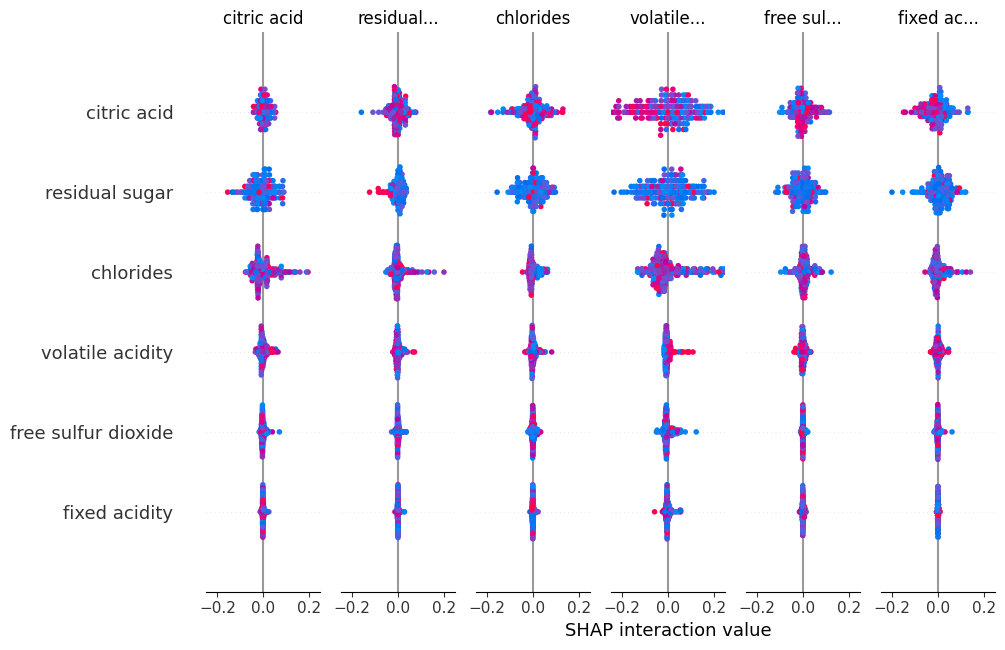

In [44]:
import pandas as pd
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

data = pd.read_csv("https://raw.githubusercontent.com/STATS201-DKU-Autumn2024/Aaron/refs/heads/main/data/WineQT.csv")

# 提取特征（X）和目标（y）
X = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
          'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
          'pH', 'sulphates', 'alcohol']]
y = data['quality']

# 标签编码
y = LabelEncoder().fit_transform(y)

# 数据集分割，80%用于训练，20%用于测试
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建并训练随机森林模型
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 使用SHAP解释模型
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# 绘制SHAP值的条形图，查看每个特征对质量预测的影响
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)

# 显示图形
plt.tight_layout()
plt.show()
